In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-detection-fer/test/fearful/im292.png
/kaggle/input/emotion-detection-fer/test/fearful/im1022.png
/kaggle/input/emotion-detection-fer/test/fearful/im633.png
/kaggle/input/emotion-detection-fer/test/fearful/im934.png
/kaggle/input/emotion-detection-fer/test/fearful/im927.png
/kaggle/input/emotion-detection-fer/test/fearful/im966.png
/kaggle/input/emotion-detection-fer/test/fearful/im662.png
/kaggle/input/emotion-detection-fer/test/fearful/im648.png
/kaggle/input/emotion-detection-fer/test/fearful/im178.png
/kaggle/input/emotion-detection-fer/test/fearful/im817.png
/kaggle/input/emotion-detection-fer/test/fearful/im308.png
/kaggle/input/emotion-detection-fer/test/fearful/im623.png
/kaggle/input/emotion-detection-fer/test/fearful/im651.png
/kaggle/input/emotion-detection-fer/test/fearful/im72.png
/kaggle/input/emotion-detection-fer/test/fearful/im229.png
/kaggle/input/emotion-detection-fer/test/fearful/im444.png
/kaggle/input/emotion-detection-fer/test/fearful/im415.p

In [2]:
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import plotly.express as px

In [3]:
train_dir = "../input/emotion-detection-fer/train" #passing the path with training images
test_dir = "../input/emotion-detection-fer/test"   #passing the path with testing images

In [4]:
label = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [5]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )

In [6]:
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [7]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (48,48),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )

Found 22968 images belonging to 7 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (48,48),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 1432 images belonging to 7 classes.


In [9]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

2022-09-21 20:53:56.426056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 20:53:56.430374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 20:53:56.431340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 20:53:56.433274: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [11]:
history_ = model.fit(x = train_generator,epochs = 30 ,validation_data = validation_generator)

2022-09-21 20:54:00.722006: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-09-21 20:54:04.535792: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


359/359 [==============================] - 190s 502ms/step - loss: 9.2934 - accuracy: 0.1997 - val_loss: 8.8733 - val_accuracy: 0.1725
Epoch 2/30
359/359 [==============================] - 38s 105ms/step - loss: 8.2629 - accuracy: 0.2333 - val_loss: 7.5785 - val_accuracy: 0.2912
Epoch 3/30
359/359 [==============================] - 37s 104ms/step - loss: 7.2639 - accuracy: 0.2535 - val_loss: 6.5581 - val_accuracy: 0.3212
Epoch 4/30
359/359 [==============================] - 36s 101ms/step - loss: 6.3082 - accuracy: 0.2794 - val_loss: 5.6284 - val_accuracy: 0.3659
Epoch 5/30
359/359 [==============================] - 36s 101ms/step - loss: 5.4044 - accuracy: 0.3184 - val_loss: 4.9816 - val_accuracy: 0.3520
Epoch 6/30
359/359 [==============================] - 35s 98ms/step - loss: 4.6454 - accuracy: 0.3506 - val_loss: 4.2639 - val_accuracy: 0.3855
Epoch 7/30
359/359 [==============================] - 36s 100ms/step - loss: 4.0283 - accuracy: 0.3723 - val_loss: 4.2368 - val_accuracy: 0.3

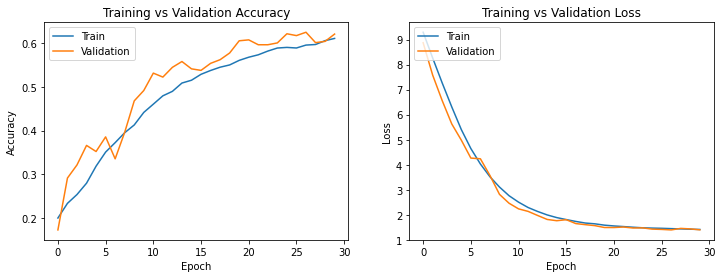

In [12]:
fig , ax = plt.subplots(1,2)
train_acc = history_.history['accuracy']
train_loss = history_.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history_.history['accuracy'])
ax[0].plot(history_.history['val_accuracy'])
ax[0].set_title('Training vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_.history['loss'])
ax[1].plot(history_.history['val_loss'])
ax[1].set_title('Training vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

(48, 48)


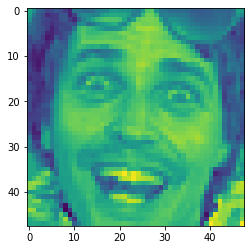

In [13]:
img = image.load_img("../input/emotion-detection-fer/test/happy/im1021.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [14]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[7.2642226e-27, 0.0, 1.0, 9.353671e-27, 0.0, 0.0, 1.4281617e-15]


In [15]:
img_index = result.index(max(result))
print(label[img_index])
plt.show()

Fear


In [16]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)

23/23 [==============================] - 1s 56ms/step - loss: 1.3970 - accuracy: 0.6208
